In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear(fund = 100000, N = 100,  r_up = +.5, r_down = -.4):
    return_rates = np.array([r_up if i%2==0 else r_down  for i in range(N)])
    linear_returns = return_rates * fund
    linear_navs = np.insert(fund + linear_returns.cumsum(), 0, fund)
    return linear_navs

In [3]:
def compound(fund = 100000, N = 100,  r_up = +.5, r_down = -.4):
    return_rates = np.array([r_up if i%2==0 else r_down  for i in range(N)])
    compound_factors = (1+return_rates).cumprod()
    compound_navs = np.insert(fund * compound_factors, 0, fund)
    return compound_navs

In [29]:
def compare(fund = 100000, N = 100,  r_up = +.5, r_down = -.4):
    linear_navs = linear(fund, N, r_up, r_down)
    compound_navs = compound(fund, N, r_up, r_down)
    
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    ax.set_title(f'compound vs linear (win: {r_up:+.1%}, loss: {r_down:+.1%})')
    ax.plot(linear_navs, label='linear')
    ax.plot(compound_navs, label='compound')
    ax.axhline(fund, color='k')
    ax.set_xlim(0)
    ax.legend()

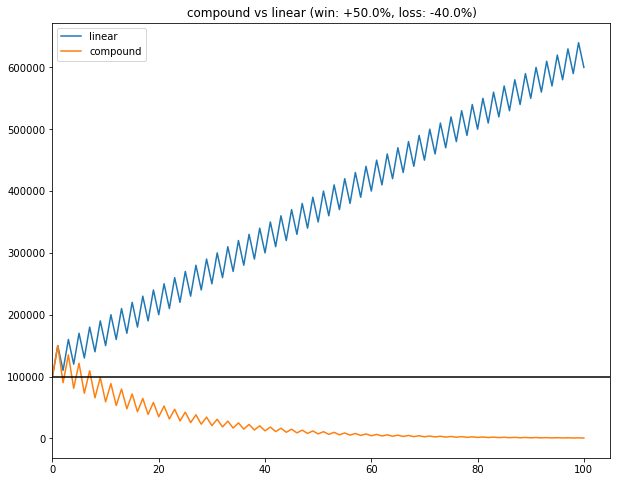

In [39]:
compare(r_up=+.50, r_down=-.40, N=100)